<a href="https://colab.research.google.com/github/rohulfahad/skill-morph/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/health_lifestyle_dataset.csv')

In [ ]:
df.describe()
df.info()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

Index(['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history', 'disease_risk'],
      dtype='object')

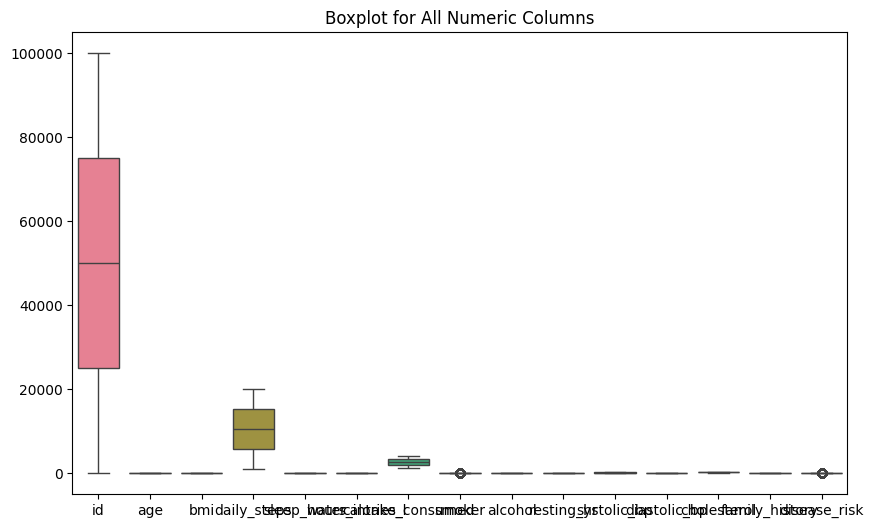

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numeric Columns")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,1,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,0,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,1,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,0,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,0,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier_counts = outlier_mask.sum()

print(outlier_counts)



id                       0
age                      0
gender                   0
bmi                      0
daily_steps              0
sleep_hours              0
water_intake_l           0
calories_consumed        0
smoker               20094
alcohol                  0
resting_hr               0
systolic_bp              0
diastolic_bp             0
cholesterol              0
family_history           0
disease_risk         24821
dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [ ]:
X=df.drop('disease_risk',axis=1)
y=df['disease_risk']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)


dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))




Decision Tree Results:
Accuracy: 0.74705
Confusion Matrix:
 [[14885   157]
 [ 4902    56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85     15042
           1       0.26      0.01      0.02      4958

    accuracy                           0.75     20000
   macro avg       0.51      0.50      0.44     20000
weighted avg       0.63      0.75      0.65     20000



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.819632881085395
[[13676  1286]
 [ 4138 10972]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     14962
           1       0.90      0.73      0.80     15110

    accuracy                           0.82     30072
   macro avg       0.83      0.82      0.82     30072
weighted avg       0.83      0.82      0.82     30072



In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


print("🤝 KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


🤝 KNN Results:
Accuracy: 0.7081670657089651
Confusion Matrix:
 [[ 7699  7263]
 [ 1513 13597]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.51      0.64     14962
           1       0.65      0.90      0.76     15110

    accuracy                           0.71     30072
   macro avg       0.74      0.71      0.70     30072
weighted avg       0.74      0.71      0.70     30072



In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.50109736632083
Confusion Matrix:
 [[7803 7159]
 [7844 7266]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     14962
           1       0.50      0.48      0.49     15110

    accuracy                           0.50     30072
   macro avg       0.50      0.50      0.50     30072
weighted avg       0.50      0.50      0.50     30072

